In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Ejercicio 1

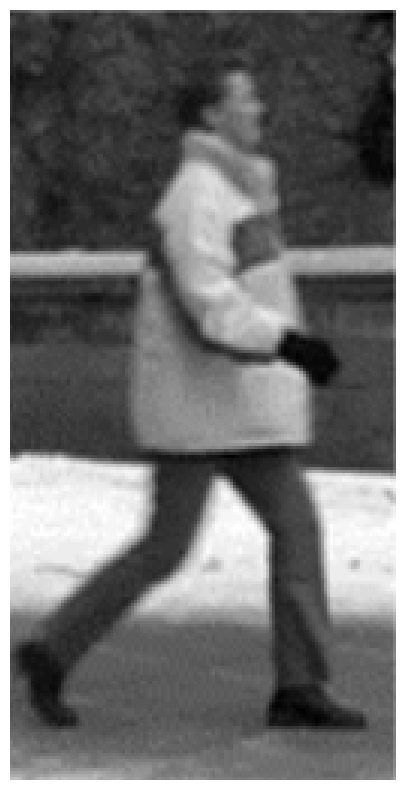

In [18]:
def process_image(file_path, scale_factor):
    # Read the image
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Compute new dimensions
    height, width = 128 * scale_factor, 64 * scale_factor

    # Resize the grayscale image
    resized_img = cv2.resize(img, (width, height))

    return resized_img

# Example usage
img_result = process_image('/content/person.png', 2)

plt.figure(figsize=(10, 10))
plt.imshow(img_result, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


## Ejercicio 2

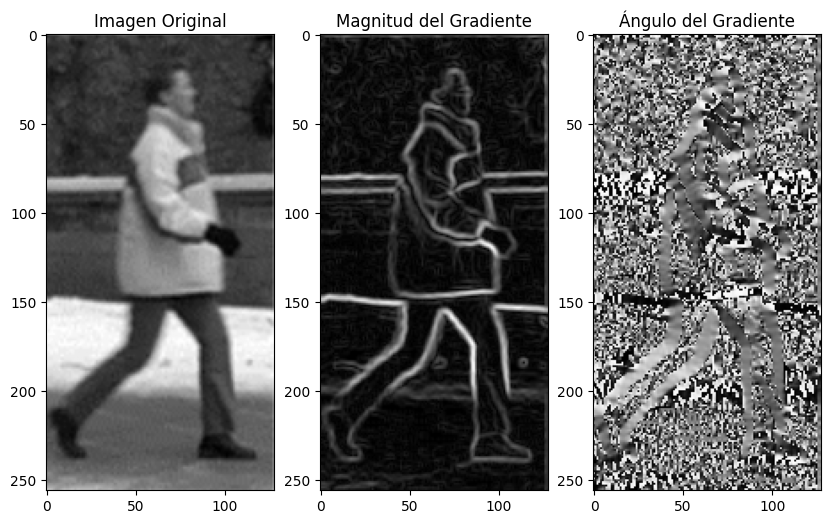

In [19]:
def compute_gradient(gray_img, method='prewitt'):
    kernels = {
        'prewitt': (np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32),
                    np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)),
        'sobel': (np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32),
                  np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32))
    }

    if method.lower() not in kernels:
        raise ValueError("Método inválido. Use 'prewitt' o 'sobel'.")

    kernel_x, kernel_y = kernels[method.lower()]

    img_float = gray_img.astype(np.float32)
    Gx = cv2.filter2D(img_float, -1, kernel_x, borderType=cv2.BORDER_REPLICATE)
    Gy = cv2.filter2D(img_float, -1, kernel_y, borderType=cv2.BORDER_REPLICATE)

    magnitude = np.sqrt(Gx**2 + Gy**2)
    angle = np.mod(np.arctan2(-Gy, Gx) * (180.0 / np.pi) + 180, 180)

    return magnitude, angle

# Procesar imagen
image_data = process_image('/content/person.png', 2)
magnitude, angle = compute_gradient(image_data, method='prewitt')

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image_data, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Magnitud del Gradiente')
plt.imshow(magnitude / magnitude.max(), cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Ángulo del Gradiente')
plt.imshow(angle / 180.0, cmap='gray')
plt.show()


## Ejercicio 3

In [20]:
def extract_gradient_blocks(mag_img, ang_img, size=8):
    step = size // 2
    height, width = mag_img.shape

    rows = (height // step) - 1
    cols = (width // step) - 1

    bloques_magnitud = np.zeros((rows, cols, size, size), dtype=mag_img.dtype)
    bloques_angulo = np.zeros((rows, cols, size, size), dtype=ang_img.dtype)

    for row in range(rows):
        for col in range(cols):
            top = row * step
            left = col * step

            bloques_magnitud[row, col] = mag_img[top:top+size, left:left+size]
            bloques_angulo[row, col] = ang_img[top:top+size, left:left+size]

    return bloques_magnitud, bloques_angulo



In [21]:
# Aplicar extracción de bloques
grad_mag_blocks, grad_ang_blocks = extract_gradient_blocks(magnitude, angle, size=8)

print(grad_mag_blocks)
print("\n"*10)
print(grad_ang_blocks)


[[[[ 88.23265    88.88757    89.005615  ... 101.788994  104.27847
    104.388695 ]
   [ 42.059483   53.935146   79.07591   ...  99.0202     93.52005
     99.724625 ]
   [ 66.48308    45.88028    40.718548  ...  43.104523   34.0147
     17.029387 ]
   ...
   [ 59.665737   57.801384   42.190044  ...  13.341664   20.615528
     16.970562 ]
   [ 50.635956   47.539455   39.849716  ...  23.086792   22.203604
     23.43075  ]
   [ 31.144823   22.803509   16.40122   ...  19.         27.202942
     25.495098 ]]

  [[100.17984   101.788994  104.27847   ...  97.984695   89.358826
     87.09765  ]
   [102.70345    99.0202     93.52005   ... 124.95199   119.218285
    109.65856  ]
   [ 15.033297   43.104523   34.0147    ...  55.362442   61.7171
     47.010635 ]
   ...
   [ 14.142136   13.341664   20.615528  ...  10.630146    2.236068
     14.422205 ]
   [ 29.832869   23.086792   22.203604  ...   2.          7.81025
      9.848858 ]
   [ 16.763054   19.         27.202942  ...  12.0415945   1.4142135